In [1]:
#アフィン変換とかやるよ

%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

#とりあえず拡大縮小
img = cv2.imread('./images/lenna.jpg')
print(img.shape)
res = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
print(res.shape)

#それかこんな書き方もできる
height, width = img.shape[:2]
res2 = cv2.resize(img, (2*width, 2*height), interpolation = cv2.INTER_CUBIC)
print(res2.shape)


(217, 232, 3)
(434, 464, 3)
(434, 464, 3)


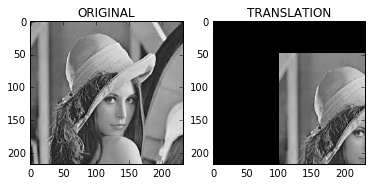

In [2]:
#画像の移動 
img = cv2.imread('./images/lenna.jpg', 0) #グレーで読み出し
rows, cols = img.shape

M = np.float32([[1, 0, 100], [0, 1, 50]]) #float32にする、小数の場合補完ってどうなってるんだろう？
dst = cv2.warpAffine(img, M, (cols, rows)) #(width, height)を渡す
#warpAffineに画像サイズを渡す際はwidth, heightの順で渡す shapeはrow(height), col(width)で返すので注意

plt.subplot(121), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(122), plt.imshow(dst, 'gray'), plt.title('TRANSLATION')
plt.show()

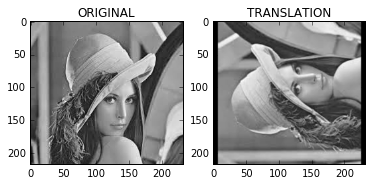

In [3]:
#画像の回転
#opencvは回転中心、回転角、拡大縮小を指定できる関数がある
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1) #回転中心、回転角、スケール 
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(122), plt.imshow(dst, 'gray'), plt.title('TRANSLATION')
plt.show()


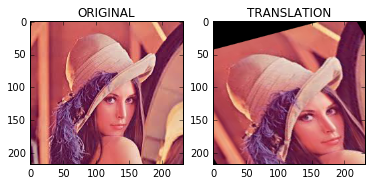

In [4]:
#アフィン変換、平行線は平行線のまま変換される
#元画像での3点とその3点が変換でどこに行くかを指定する


img = cv2.imread('./images/lenna.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M=cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

mpltImg = cv2.merge((img[:, :, 2], img[:, :, 1], img[:, :, 0]))
mpltDst = cv2.merge((dst[:, :, 2], dst[:, :, 1], dst[:, :, 0]))

plt.subplot(121), plt.imshow(mpltImg, 'gray'), plt.title('ORIGINAL')
plt.subplot(122), plt.imshow(mpltDst, 'gray'), plt.title('TRANSLATION')
plt.show()

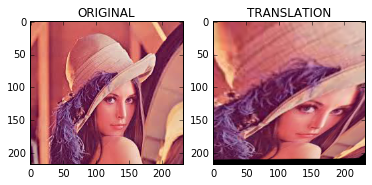

In [21]:
#パースペクティブの移動
#視点を移動する、直線は直線に変換される

img = cv2.imread('./images/lenna.jpg')
rows, cols, ch = img.shape

#変換前と変換後の4点を指定
pts1 = np.float32([[56, 65], [120, 52], [38, 200], [200, 200]])
pts2 = np.float32([[0, 0], [200, 0], [0, 200], [200, 200]])
#チュートリとは画像が違うため、かなり適当に指定

M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img, M, (cols, rows))


mpltImg = cv2.merge((img[:, :, 2], img[:, :, 1], img[:, :, 0]))
mpltDst = cv2.merge((dst[:, :, 2], dst[:, :, 1], dst[:, :, 0]))

plt.subplot(121), plt.imshow(mpltImg, 'gray'), plt.title('ORIGINAL')
plt.subplot(122), plt.imshow(mpltDst, 'gray'), plt.title('TRANSLATION')
plt.show()

#なんのことか全然わからんな